<a href="https://colab.research.google.com/github/glwat/Durham_Masters/blob/main/Master's_Variable_Exploration_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Input Variables

This colab notebook loads the excel climate variable data vs rockfall event from Whitby (2021) into an dataframe. The dataset contains seperate observations for each rockfall (where rockfall occurrs) and hourly observations where rockfall does not. Hence, multiple observations may exist for a single DateTime measurement. The code creates a new aggreagted dataframe, where volumes of rockfall occurring within the same hour are summed, alongside event counts (which are 1 for each rockfall observation). The mean of climatic input variables is taken, although where multiple observations exist for a single hour (as is the case where multiple rockfall occur within the hour), these are identical. I believe there is an issue with code from either notebooks that generates the Hourly_Rainfall variables, as negative values are created, which are removed.

The code plots the distribution of input variables (histogram, KDE) in the aggregated dataset, with rainfall variables on log axes. A new variable (Rockfall_Occurrence) is generated that indicates (binary) the presence of rockfall in each hour. Logistic regression is conducted on each input variable. The variables are then scattered against total rockfall volume within the hour.

Code Block 1: Mounting Drive

In [ ]:
# Code Block 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Code Block 2: Load the master excel file

In [ ]:
# Code Block 5: Correctly load an Excel file and inspect structure

import pandas as pd

# File path variable (update this to your actual file)
file_path = "/content/drive/MyDrive/Masters_Colab_Data/Master_Rockfall_2021.xlsx"

# Load the dataset (Excel)
df = pd.read_excel(file_path)

# Display dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8376 entries, 0 to 8375
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    8376 non-null   int64         
 1   Datetime              8376 non-null   datetime64[ns]
 2   Gap_Rockfall          5193 non-null   object        
 3   Gap_hours             258 non-null    float64       
 4   Rockfall_Volume       8376 non-null   float64       
 5   Volume_Error          8376 non-null   float64       
 6   Rockfall_Event_Count  8376 non-null   int64         
 7   Total_Rainfall        8376 non-null   float64       
 8   Air_Temp              8376 non-null   float64       
 9   Relative_Humidity     8376 non-null   float64       
 10  Hourly_Rainfall       8330 non-null   float64       
 11  Thermal_image_name    4071 non-null   object        
 12  TA                    4071 non-null   float64       
 13  Tmean             

Codeblock 2a: Rename the input dataframe as df_agg. This step is required as the script predates the generation of the master dataframe. Hence, the unneccesary steps have been removed and steps to inport the correct master dataset have been appended to the top of this script

In [ ]:
df_agg=df

#Exploring input variables

Code Block 7: Generate missing values table

In [ ]:
# Code block 7: Generate missing values table

import pandas as pd

# Total number of observations (rows)
total_obs = len(df_agg)

# Missing values per column
missing_counts = df_agg.isna().sum()

# Select numeric columns only (for min/max)
numeric_cols = df_agg.select_dtypes(include='number')

# Build combined summary table
combined_table = pd.DataFrame({
    'Missing': missing_counts,
    'Total Observations': total_obs,
    'Min': numeric_cols.min(),
    'Max': numeric_cols.max()
})

combined_table

,Missing,Total Observations,Min,Max
Air_Temp,0,8376,-3.100000,33.700000
Datetime,0,8376,NaN,NaN
Gap_Rockfall,3183,8376,NaN,NaN
Gap_hours,8118,8376,0.000000,24.000000
Hourly_Rainfall,46,8376,0.000000,12.190000
ID,0,8376,2.000000,11407.000000
Ref_File,3454,8376,NaN,NaN
Ref_Max,3454,8376,-8.262536,-2.093008
Ref_Mean,3454,8376,-12.897070,-6.513940
Ref_Min,3454,8376,-16.449558,-14.042845


# Exploring Input Variables

In [ ]:
# Code Block: List of variable names

variable_names = df_agg.columns.tolist()
variable_names

['ID',
 'Datetime',
 'Gap_Rockfall',
 'Gap_hours',
 'Rockfall_Volume',
 'Volume_Error',
 'Rockfall_Event_Count',
 'Total_Rainfall',
 'Air_Temp',
 'Relative_Humidity',
 'Hourly_Rainfall',
 'Thermal_image_name',
 'TA',
 'Tmean',
 'Tmin',
 'Tmax',
 'Tmeandiff',
 'Tmindiff',
 'Tmaxdiff',
 'W1-BSS-Tmean',
 'W2-IBSS-Tmean',
 'Ref_File',
 'Ref_Mean',
 'Ref_Max',
 'Ref_Min',
 'Ref_Range',
 'Ref_sd',
 'Rockfall_Occurrence']

In [ ]:
# Code Block 13: Define output and input variables

# Output (target) variables
output_vars = [
    'Rockfall_Volume',
    'Volume_Error',
    'Rockfall_Event_Count',
    'Rockfall_Occurrence'
 ]

# Input (feature) variables
input_vars = [
  'Total_Rainfall',
 'Air_Temp',
 'Relative_Humidity',
 'Hourly_Rainfall',
    'Tmean', 'Tmax','Ref_Mean',
 'Ref_Max',
]

# Other variables
other_vars = ['ID',
 'Datetime',
 'Gap_Rockfall',
 'Gap_hours', 'Tmin',
 'Ref_Min',
 'Ref_Range',
 'Ref_sd',
 'Tmeandiff',
 'Tmindiff',
 'Tmaxdiff',
 'W1-BSS-Tmean',
 'W2-IBSS-Tmean',
 'Ref_File',   'Thermal_image_name',
 'TA',
              ]

print("Output variables:", output_vars)
print("Input variables:", input_vars)
print("Other variables:", other_vars)

Output variables: ['Rockfall_Volume', 'Volume_Error', 'Rockfall_Event_Count', 'Rockfall_Occurrence']
Input variables: ['Total_Rainfall', 'Air_Temp', 'Relative_Humidity', 'Hourly_Rainfall', 'Tmean', 'Tmax', 'Ref_Mean', 'Ref_Max']
Other variables: ['ID', 'Datetime', 'Gap_Rockfall', 'Gap_hours', 'Tmin', 'Ref_Min', 'Ref_Range', 'Ref_sd', 'Tmeandiff', 'Tmindiff', 'Tmaxdiff', 'W1-BSS-Tmean', 'W2-IBSS-Tmean', 'Ref_File', 'Thermal_image_name', 'TA']


In [ ]:
# Code Block 16: Clean variable labels for plotting

clean_labels = {
    'Total_Rainfall': 'Rainfall since Midnight (mm)',
    'Air_Temp': 'Air Temperature (°C)',
    'Relative_Humidity': 'Relative Humidity (%)',
    'Hourly_Rainfall': 'Hourly Rainfall (mm)',
    'Tmean': 'Surface Temperature (Pixel Mean) (°C)',
    'Tmax': 'Surface Temperature (Pixel Max) (°C)',
    'Rockfall_Volume': 'Rockfall Volume (m^3)',
    'Volume_Error': 'Rockfall Volume Error (m^3)',
    'Rockfall_Occurrence': 'Rockfall Occurrence',
    'Rockfall_Event_Count' : 'Rockfall Event Count',
    'Ref_Mean': 'Surface Reflectance (Pixel Mean)',
    'Ref_Max': 'Surface Reflectance (Pixel Max)',
}

print("Cleaned variable labels ready for plotting:")
for k, v in clean_labels.items():
    print(f"{k} → {v}")

Cleaned variable labels ready for plotting:
Total_Rainfall → Rainfall since Midnight (mm)
Air_Temp → Air Temperature (°C)
Relative_Humidity → Relative Humidity (%)
Hourly_Rainfall → Hourly Rainfall (mm)
Tmean → Surface Temperature (Pixel Mean) (°C)
Tmax → Surface Temperature (Pixel Max) (°C)
Rockfall_Volume → Rockfall Volume (m^3)
Volume_Error → Rockfall Volume Error (m^3)
Rockfall_Occurrence → Rockfall Occurrence
Rockfall_Event_Count → Rockfall Event Count
Ref_Mean → Surface Reflectance (Pixel Mean)
Ref_Max → Surface Reflectance (Pixel Max)


Exploring Distributions of Input Variables

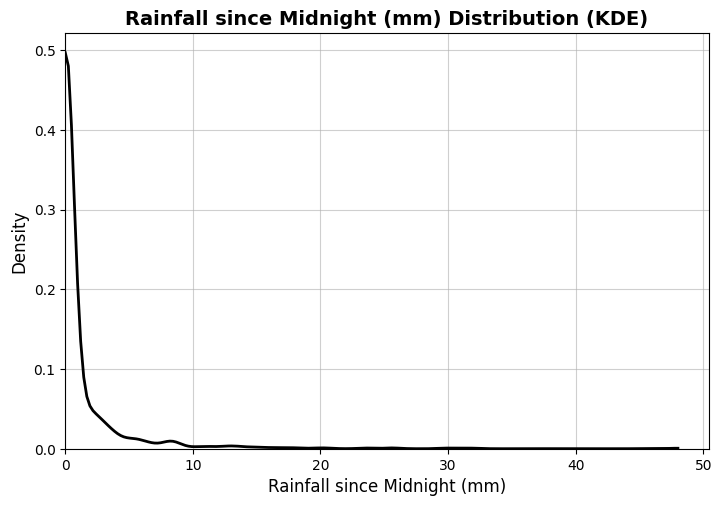

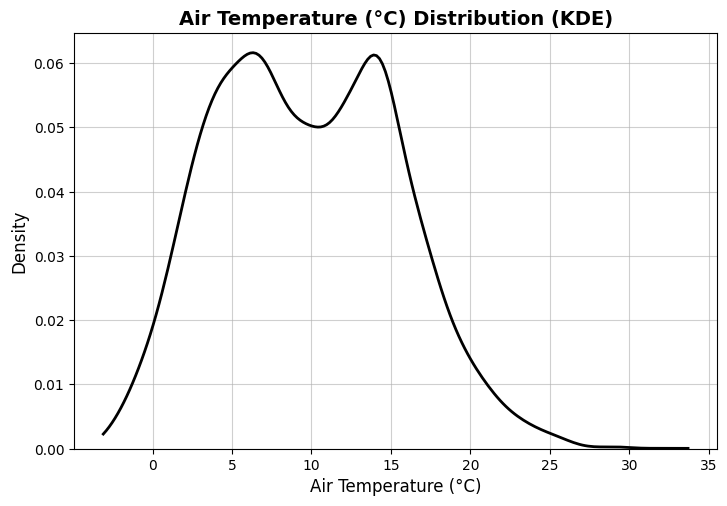

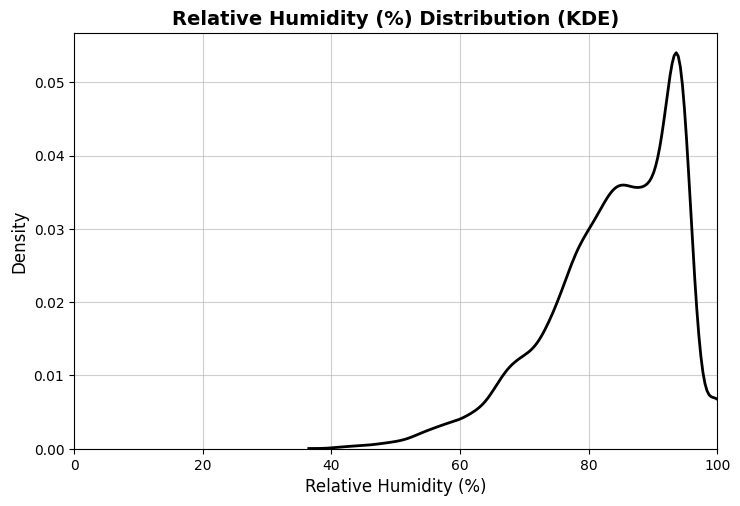

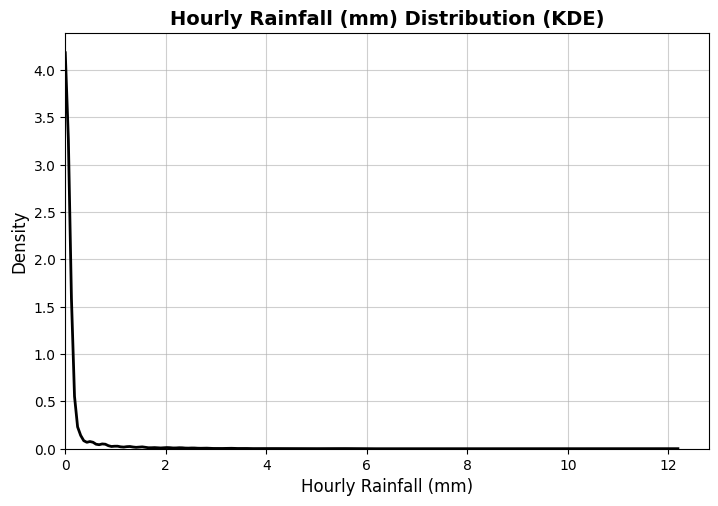

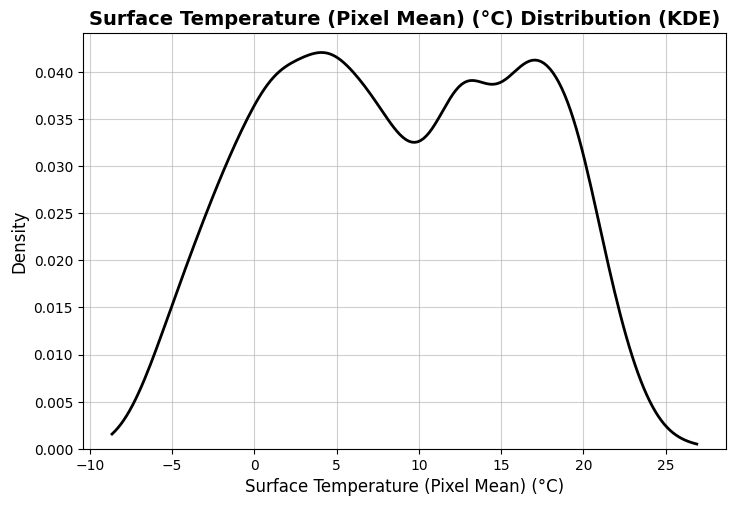

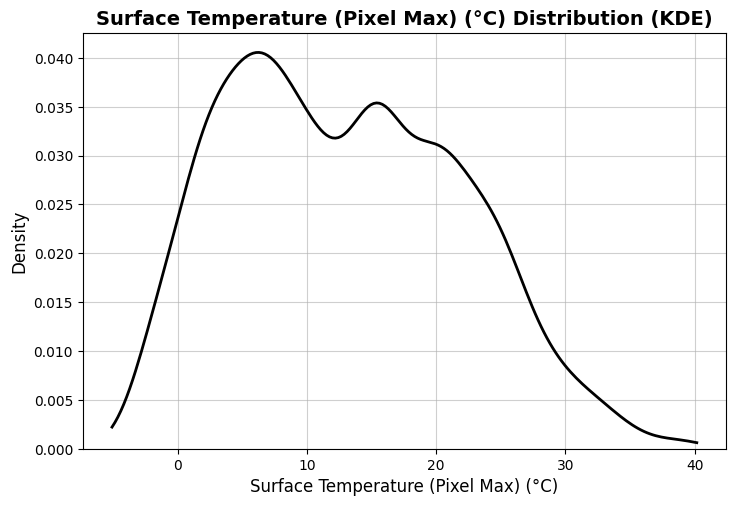

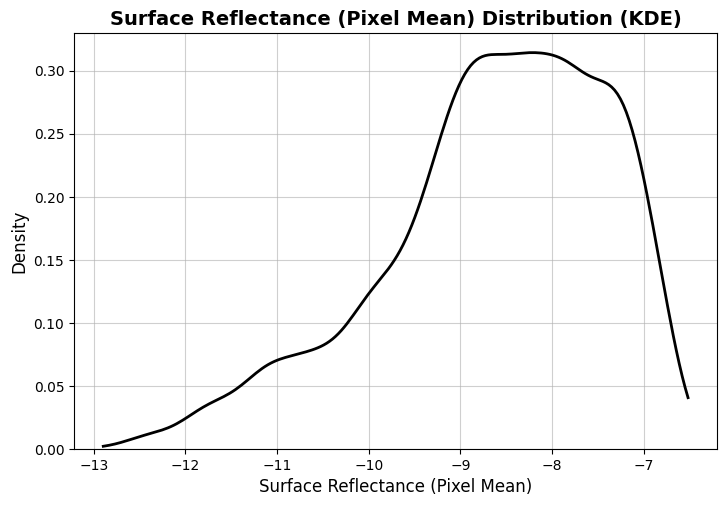

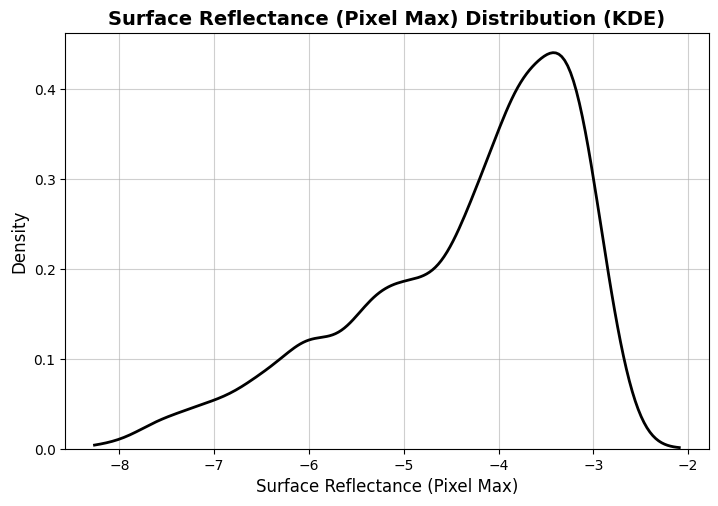

In [ ]:
# Code Block 15b.c: KDE plots with physical support enforced

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig_width = 8.3
fig_height = 5.4

for var in input_vars:

    if not pd.api.types.is_numeric_dtype(df_agg[var]):
        continue

    data = df_agg[var].dropna()

    # Set variable-specific clip bounds
    if var in ['Total_Rainfall', 'Hourly_Rainfall']:
        clip_bounds = (0, None)          # rainfall ≥ 0
    elif var == 'Relative_Humidity':
        clip_bounds = (0, 100)           # RH between 0 and 100
    else:
        clip_bounds = (None, None)       # no special constraint

    if len(data) == 0:
        continue

    plt.figure(figsize=(fig_width, fig_height))

    sns.kdeplot(
        data,
        linewidth=2,
        color='black',
        cut=0,              # do not extend beyond data range
        clip=clip_bounds    # enforce physical limits
    )

    plt.xlabel(clean_labels.get(var, var), fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.title(f"{clean_labels.get(var, var)} Distribution (KDE)", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.6)

    # Optional: also enforce x-limits visually
    if clip_bounds[0] is not None or clip_bounds[1] is not None:
        plt.xlim(clip_bounds)

    plt.show()

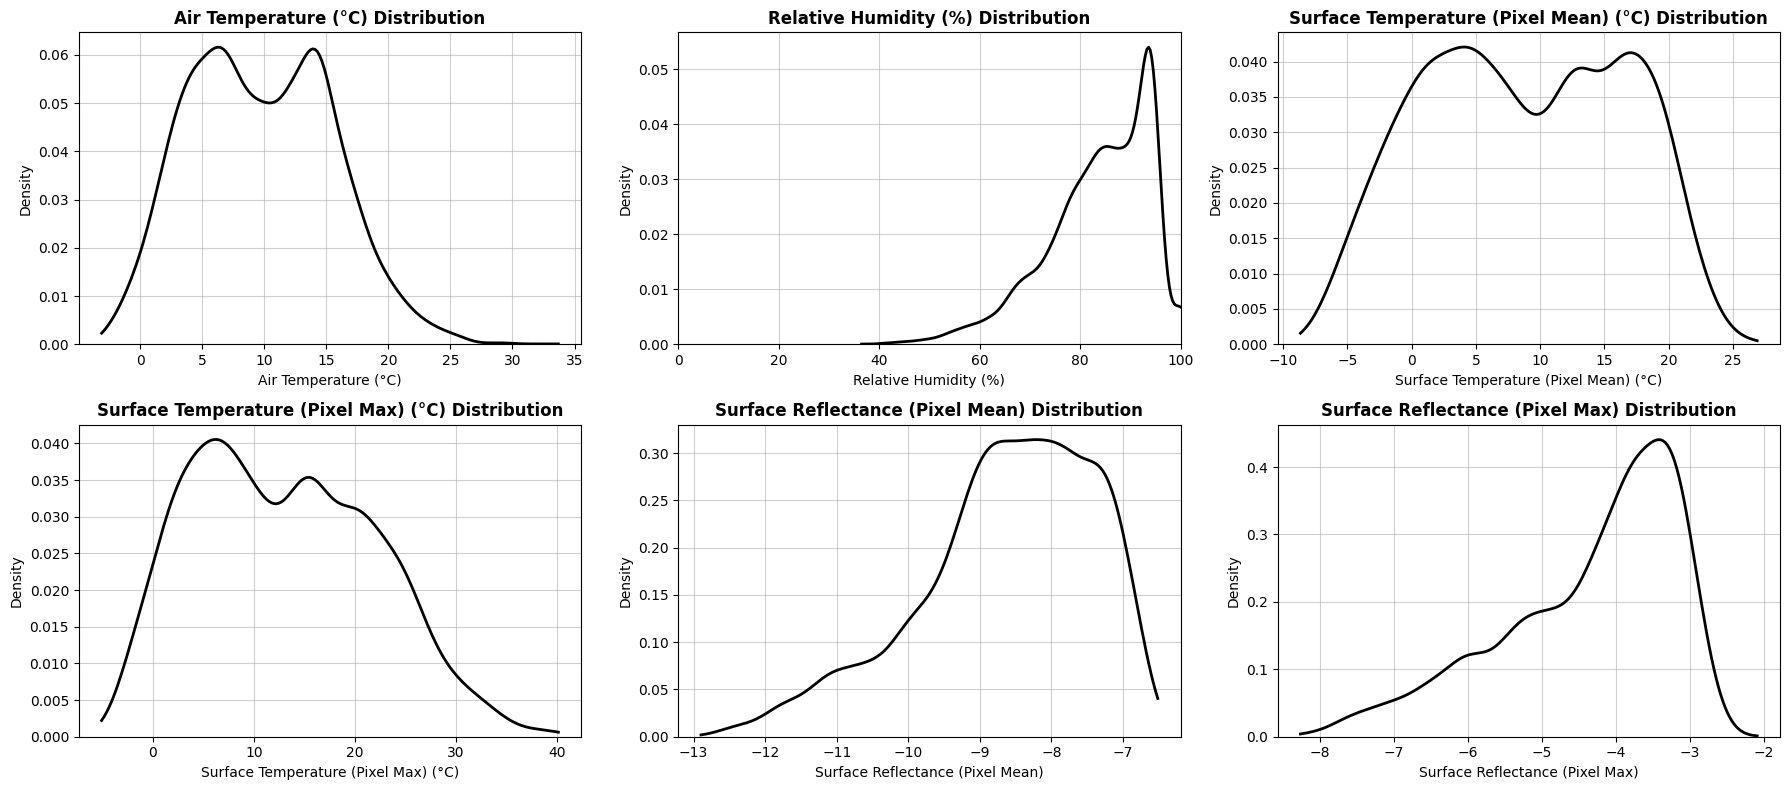

In [ ]:
# Code Block 15b.d: KDE plot matrix for all non-rainfall input variables
# - Skips rainfall variables
# - Skips sine/cosine cyclic variables
# - Enforces physical support (clip bounds)
# - Produces a plot matrix (3 columns)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

fig_width = 6
fig_height = 4

# Identify non-rainfall variables
non_rain_vars = [
    v for v in input_vars
    if v not in ['Hourly_Rainfall', 'Total_Rainfall']
    and "sin" not in v.lower()
    and "cos" not in v.lower()
    and pd.api.types.is_numeric_dtype(df_agg[v])
]

# Determine subplot grid
n_vars = len(non_rain_vars)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

plt.figure(figsize=(n_cols * fig_width, n_rows * fig_height))

for i, var in enumerate(non_rain_vars):

    data = df_agg[var].dropna()

    # Set variable-specific clip bounds
    if var == 'Relative_Humidity':
        clip_bounds = (0, 100)
    else:
        clip_bounds = (None, None)

    ax = plt.subplot(n_rows, n_cols, i + 1)

    # KDE plot
    sns.kdeplot(
        data,
        linewidth=2,
        color='black',
        cut=0,
        clip=clip_bounds,
        ax=ax
    )

    # Labels and title
    ax.set_xlabel(clean_labels.get(var, var), fontsize=10)
    ax.set_ylabel("Density", fontsize=10)
    ax.set_title(
        f"{clean_labels.get(var, var)} Distribution",
        fontsize=12,
        fontweight='bold'
    )

    ax.grid(alpha=0.6)

    # Optional: enforce x-limits visually
    if clip_bounds[0] is not None or clip_bounds[1] is not None:
        ax.set_xlim(clip_bounds)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

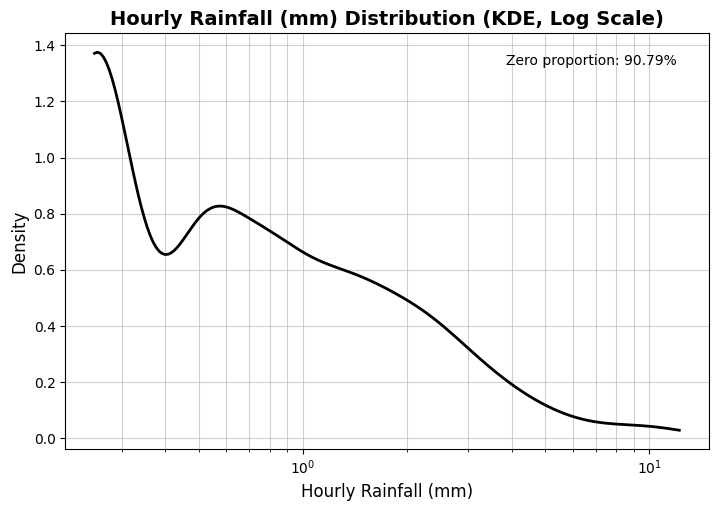

<Figure size 640x480 with 0 Axes>

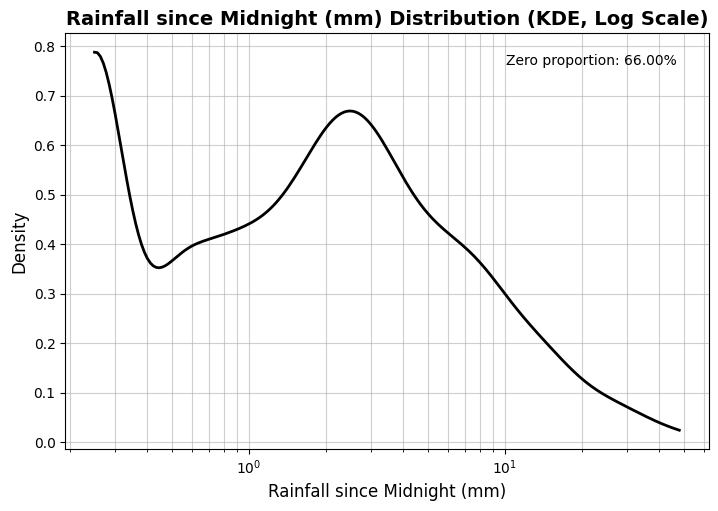

In [ ]:
# Code Block 15b.i: Log-scale KDE for rainfall variables
# Zero-inflation handled, no density below 0.01, proper log gridlines

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

fig_width = 8.3
fig_height = 5.4

rain_vars = ['Hourly_Rainfall', 'Total_Rainfall']

for var in rain_vars:

    # Skip if variable not present or not numeric
    if var not in df_agg.columns:
        continue
    if not pd.api.types.is_numeric_dtype(df_agg[var]):
        continue

    raw = df_agg[var].dropna()

    # --- Separate zeros ---
    zeros = (raw == 0).sum()
    positives = raw[raw > 0]

    # --- Apply minimum plotting threshold (LOD = 0.01) ---
    positives = positives[positives >= 0.01]

    if len(positives) == 0:
        continue

    # --- Log-transform positive values ---
    log_data = np.log10(positives)

    # --- Compute KDE in log space ---
    kde = sns.kdeplot(
        log_data,
        linewidth=2,
        color='black',
        cut=0,
        fill=False
    )

    # Extract KDE curve in log space
    line = kde.get_lines()[0]
    log_x = line.get_xdata()
    log_y = line.get_ydata()

    plt.clf()  # clear seaborn figure

    # Convert KDE back to linear x-values
    x_linear = 10 ** log_x

    # --- Plot on true log axis ---
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    ax.plot(x_linear, log_y, color='black', linewidth=2)

    ax.set_xscale('log')

    ax.set_xlabel(clean_labels.get(var, var), fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.set_title(f"{clean_labels.get(var, var)} Distribution (KDE, Log Scale)",
                 fontsize=14, fontweight='bold')

    # Full log gridlines (major + minor)
    ax.grid(True, which='both', axis='both', alpha=0.6)

    # --- Zero proportion annotation (top-right) ---
    zero_prop = zeros / len(raw)
    ax.text(
        0.95, 0.95,
        f"Zero proportion: {zero_prop:.2%}",
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right'
    )

    plt.show()

<Figure size 640x480 with 0 Axes>

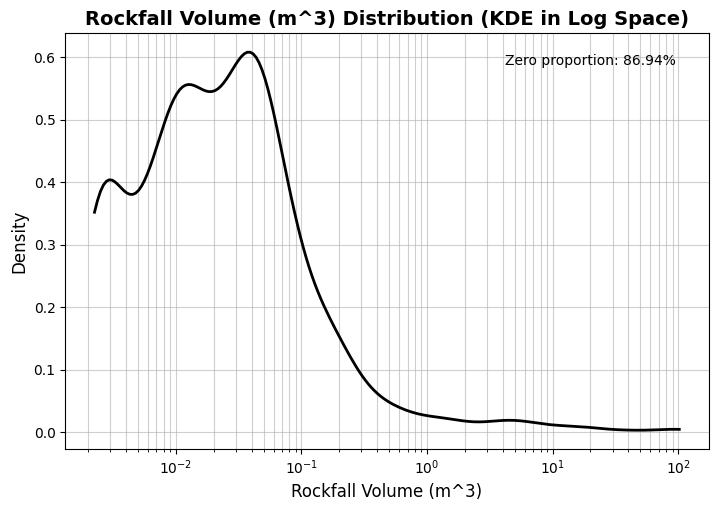

<Figure size 640x480 with 0 Axes>

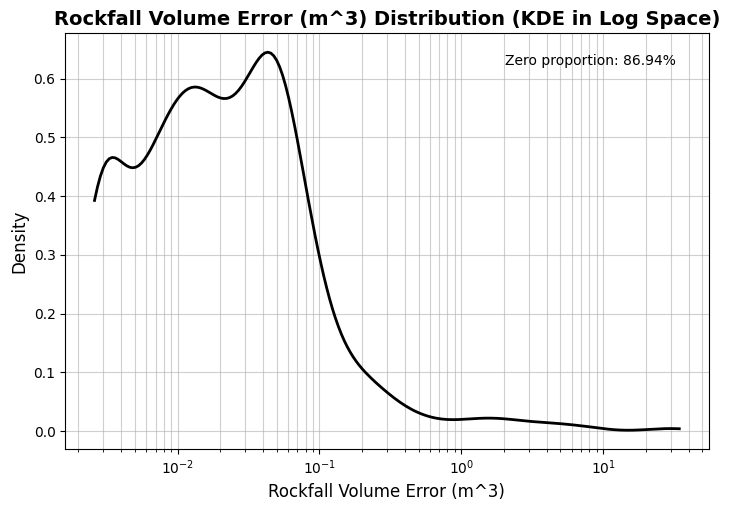

<Figure size 640x480 with 0 Axes>

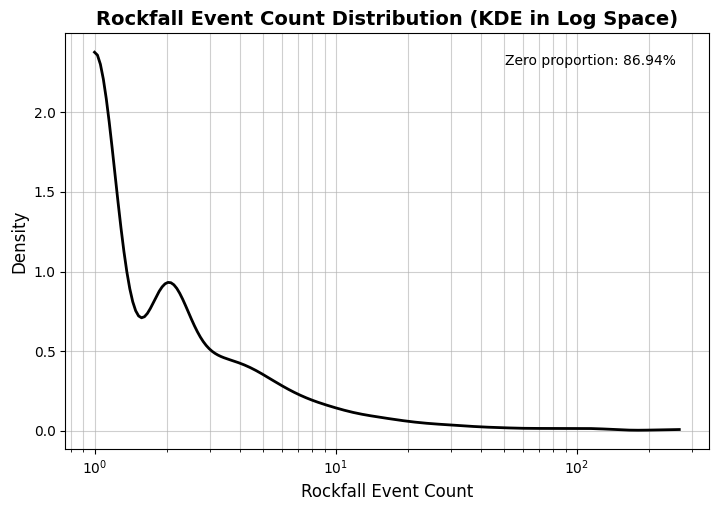

In [ ]:
# Code Block 15b.h: KDE in log-space with true log-axis gridlines
# Zero-inflation handled, no LOD, smooth lower tail, proper log gridlines

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

fig_width = 8.3
fig_height = 5.4

for var in output_vars:

    if var == 'Rockfall_Occurrence':
        continue

    if not pd.api.types.is_numeric_dtype(df_agg[var]):
        continue

    raw = df_agg[var].dropna()

    # --- Separate zeros ---
    zeros = (raw == 0).sum()
    positives = raw[raw > 0]

    if len(positives) == 0:
        continue

    # --- Log-transform ---
    log_data = np.log10(positives)

    # --- Compute KDE in log space ---
    kde = sns.kdeplot(
        log_data,
        linewidth=2,
        color='black',
        cut=0,
        fill=False
    )

    # Extract KDE curve in log space
    line = kde.get_lines()[0]
    log_x = line.get_xdata()
    log_y = line.get_ydata()

    plt.clf()  # clear seaborn figure

    # Convert KDE back to linear x-values
    x_linear = 10 ** log_x

    # --- Plot on true log axis ---
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    ax.plot(x_linear, log_y, color='black', linewidth=2)

    ax.set_xscale('log')

    ax.set_xlabel(clean_labels.get(var, var), fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    ax.set_title(f"{clean_labels.get(var, var)} Distribution (KDE in Log Space)",
                 fontsize=14, fontweight='bold')

    # Full log gridlines
    ax.grid(True, which='both', axis='both', alpha=0.6)

    # --- Zero proportion annotation (top-right) ---
    zero_prop = zeros / len(raw)
    ax.text(
        0.95, 0.95,
        f"Zero proportion: {zero_prop:.2%}",
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right'
    )

    plt.show()

Violin Plots




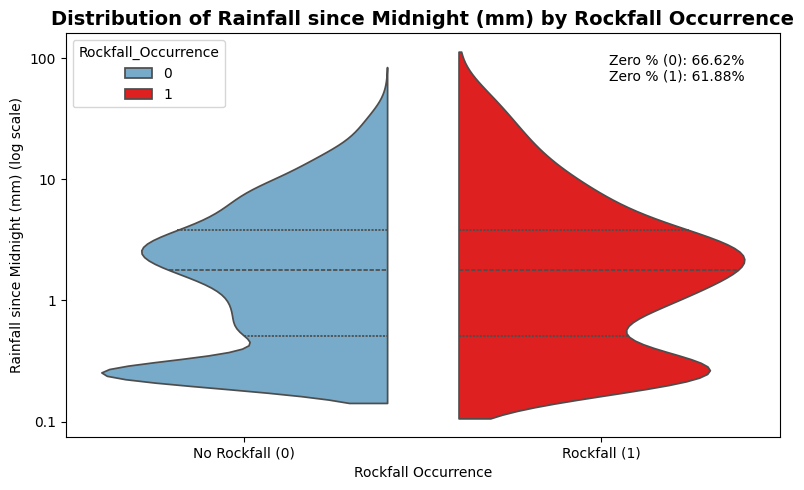

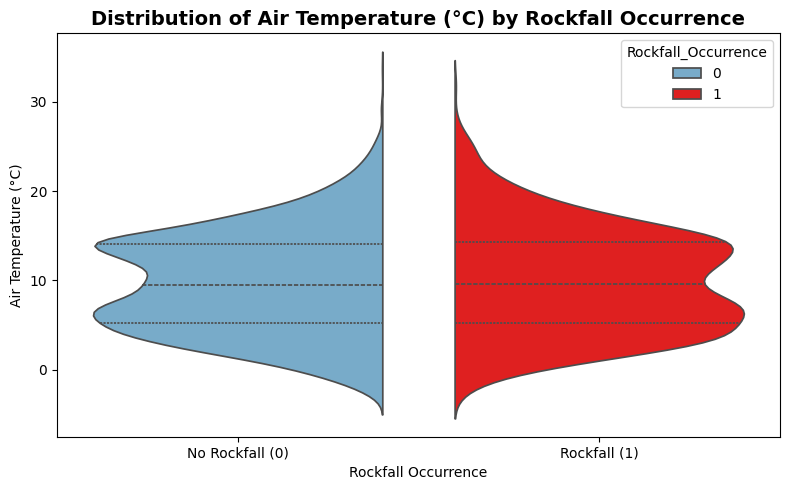

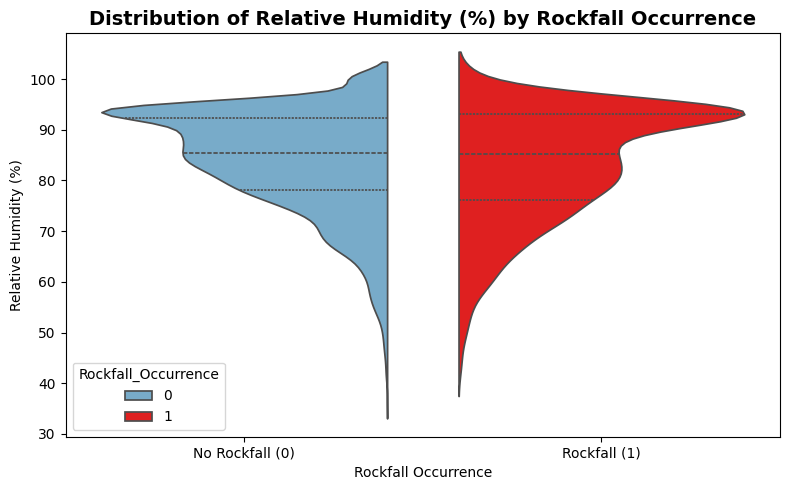

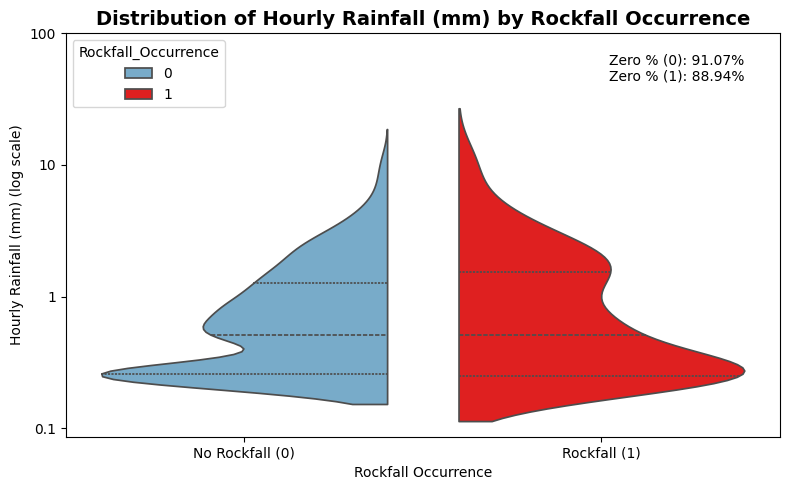

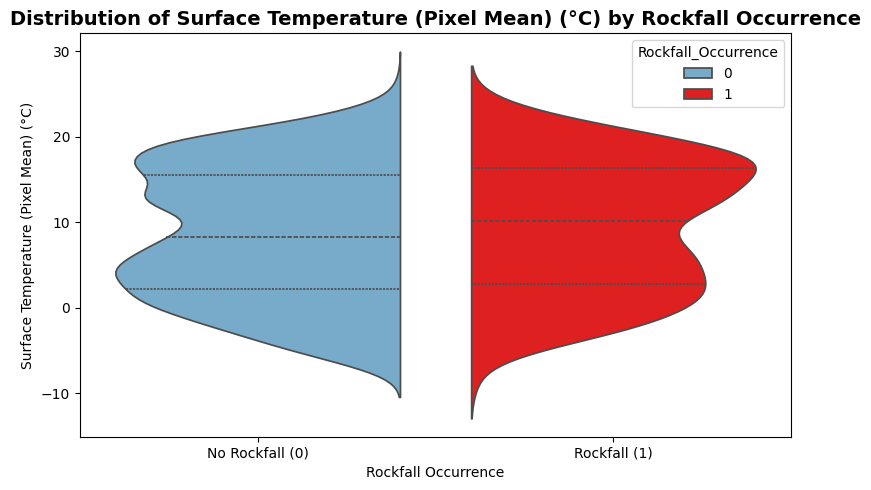

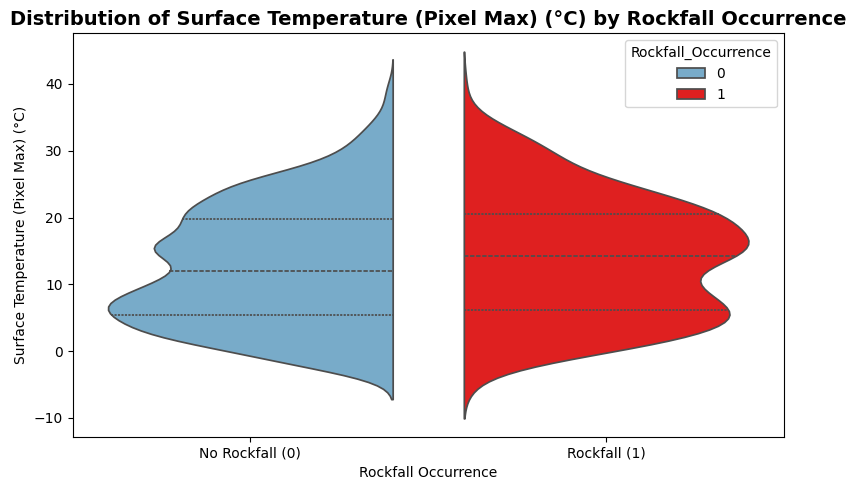

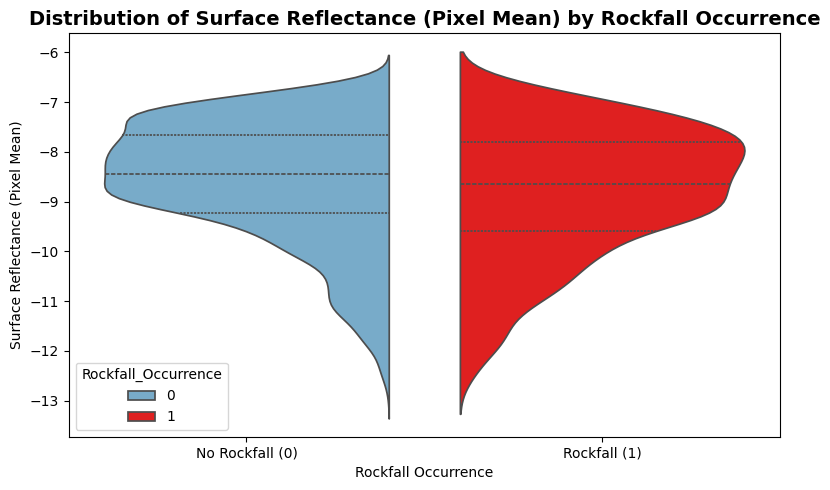

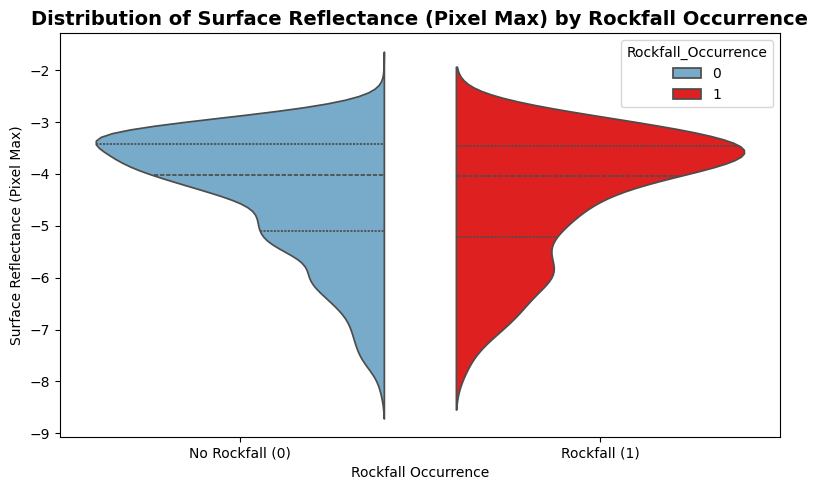

In [ ]:
# Code Block 16c: Individual violin plots for selected variables
# Log-space violins for rainfall variables, zero-inflation handled
# Separate zero percentages for Rockfall=0 and Rockfall=1
# Updated with lighter blue colour

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ---------------------------------------------------------
# Specify which variables to plot (choose from input_vars)
# Example:
# vars_to_plot = ['Air_Temp', 'Relative_Humidity', 'Hourly_Rainfall']
# ---------------------------------------------------------
vars_to_plot = input_vars  # default: all input variables

rain_vars = ['Hourly_Rainfall', 'Total_Rainfall']

# Updated palette with lighter blue
palette = {
    0: '#6BAED6',   # lighter blue
    1: 'red'
}

for var in vars_to_plot:

    if var not in df_agg.columns:
        continue

    # Extract raw data
    raw = df_agg[[var, 'Rockfall_Occurrence']].dropna()

    # --- Handle rainfall variables (log-space + zero separation) ---
    if var in rain_vars:

        # Separate by category
        raw_0 = raw[raw['Rockfall_Occurrence'] == 0]
        raw_1 = raw[raw['Rockfall_Occurrence'] == 1]

        # Zero proportions per category
        zero_prop_0 = (raw_0[var] == 0).mean()
        zero_prop_1 = (raw_1[var] == 0).mean()

        # Positive-only values for plotting
        positives = raw[raw[var] > 0].copy()
        positives['log_val'] = np.log10(positives[var])

        plot_df = positives.copy()
        y_col = 'log_val'
        y_label = clean_labels.get(var, var)

    else:
        # Non-rainfall variables: no log transform
        plot_df = raw.copy()
        y_col = var
        y_label = clean_labels.get(var, var)

    # --- Create figure ---
    plt.figure(figsize=(8, 5))

    sns.violinplot(
        x='Rockfall_Occurrence',
        y=y_col,
        data=plot_df,
        hue='Rockfall_Occurrence',
        split=True,
        inner='quartile',
        palette=palette
    )

    # Title and labels
    plt.title(f"Distribution of {y_label} by Rockfall Occurrence", fontsize=14, fontweight='bold')
    plt.xlabel("Rockfall Occurrence")
    plt.xticks([0, 1], ['No Rockfall (0)', 'Rockfall (1)'])

    # Relabel y-axis for rainfall variables
    if var in rain_vars:

        # Determine tick positions in log space
        log_min = np.floor(plot_df[y_col].min())
        log_max = np.ceil(plot_df[y_col].max())
        ticks = np.arange(log_min, log_max + 1)

        plt.yticks(
            ticks,
            [f"{10**t:.3g}" for t in ticks]
        )
        plt.ylabel(f"{y_label} (log scale)")

        # --- Zero proportions annotation (top-right) ---
        plt.text(
            0.95, 0.95,
            f"Zero % (0): {zero_prop_0:.2%}\nZero % (1): {zero_prop_1:.2%}",
            transform=plt.gca().transAxes,
            fontsize=10,
            verticalalignment='top',
            horizontalalignment='right'
        )

    else:
        plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

KDE Estimates of Rainfall Variables Split By Rockfall_Occurrence

# Logistic Regression Modelling

This code looks at regression modelling Hourly_Precipitation, Total_Precipitation (since midnight), Temperature, Humidity with Rockfall Occurrence (binary indicator that a rockfall occurred within a specified hour). The plots use the aggregated dataset (i.e. the data where each observation represents a single hour in the timeperiod, rather than a single rockfall).

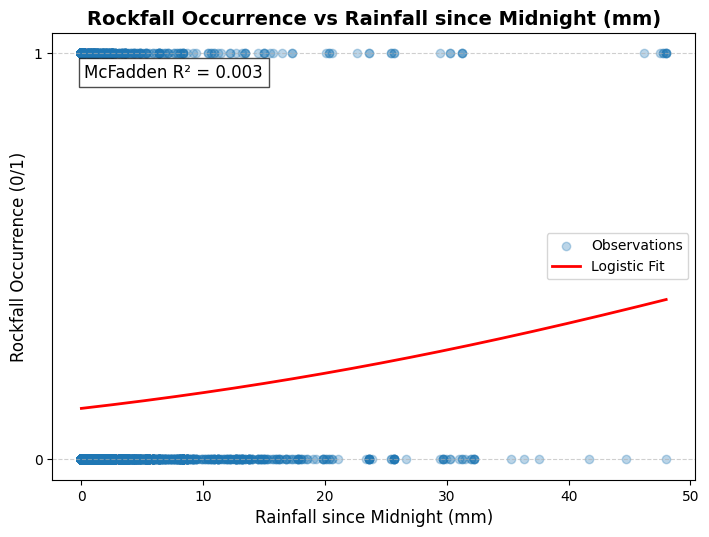

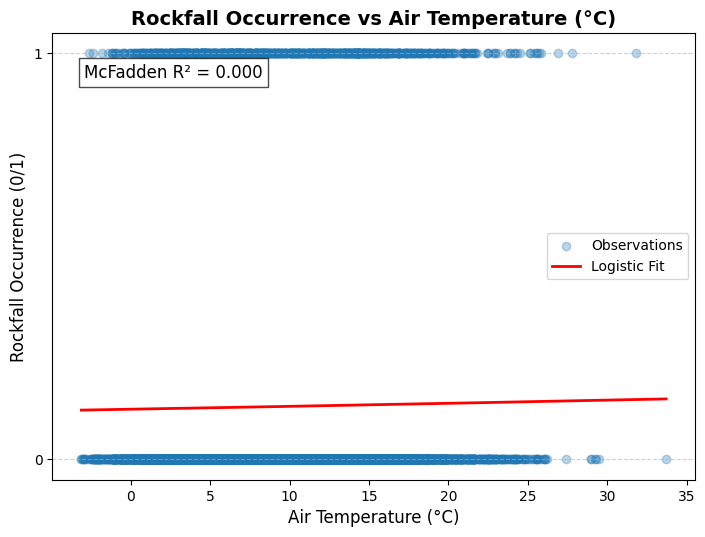

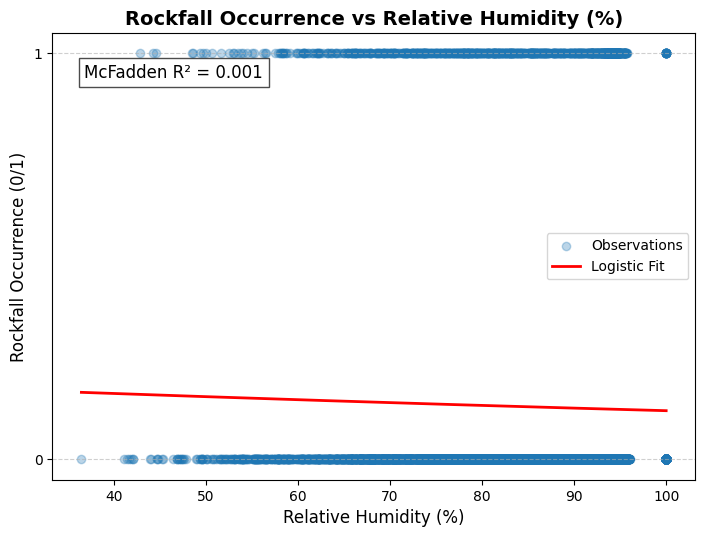

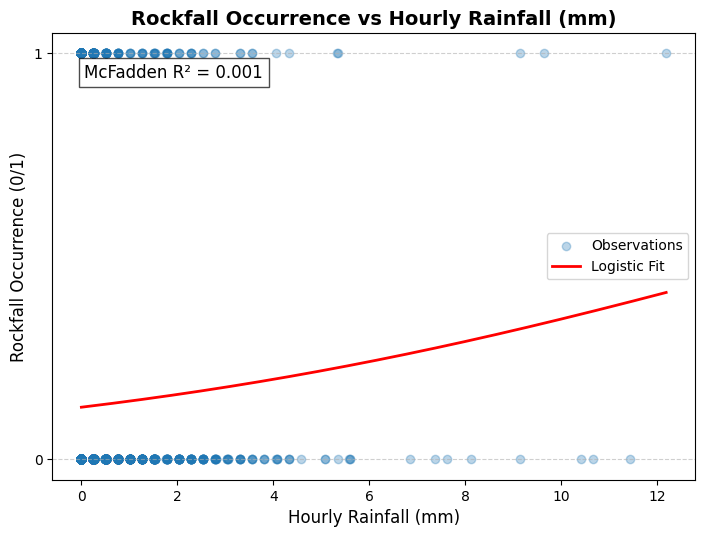

In [ ]:
# Code Block 16: Logistic regression plots for each input variable
# Updated to:
# - Skip sine/cosine date/time variables
# - Set y-axis ticks/gridlines to [0, 1]
# - Keep rainfall variables untransformed
# - Display McFadden pseudo-R² on each plot

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

fig_width = 8.3
fig_height = 5.8

def log_likelihood(y, p):
    """Compute log-likelihood for binary outcomes."""
    eps = 1e-9
    p = np.clip(p, eps, 1 - eps)
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# Loop through each input variable
for var in input_vars:

    # Skip sine/cosine cyclic encodings
    if "sin" in var.lower() or "cos" in var.lower():
        continue

    # Extract x and y
    x = df_agg[var].copy()
    y = df_agg['Rockfall_Occurrence'].copy()

    # Drop NaNs
    valid = x.notna() & y.notna()
    x_clean = x[valid].values.reshape(-1, 1)
    y_clean = y[valid].values

    # Fit logistic regression
    model = LogisticRegression()
    model.fit(x_clean, y_clean)

    # Predicted probabilities for fitted model
    p_model = model.predict_proba(x_clean)[:, 1]

    # Null model (intercept only)
    p_null = np.full_like(y_clean, y_clean.mean(), dtype=float)

    # Compute McFadden pseudo-R²
    ll_model = log_likelihood(y_clean, p_model)
    ll_null = log_likelihood(y_clean, p_null)
    r2_mcfadden = 1 - (ll_model / ll_null)

    # Generate smooth curve for plotting
    x_range = np.linspace(x_clean.min(), x_clean.max(), 300).reshape(-1, 1)
    y_pred = model.predict_proba(x_range)[:, 1]

    # Plot
    plt.figure(figsize=(fig_width, fig_height))

    # Scatter points
    plt.scatter(x_clean, y_clean, alpha=0.3, label="Observations")

    # Logistic curve
    plt.plot(x_range, y_pred, color='red', linewidth=2, label="Logistic Fit")

    # Labels
    plt.xlabel(clean_labels[var], fontsize=12)
    plt.ylabel("Rockfall Occurrence (0/1)", fontsize=12)
    plt.title(f"Rockfall Occurrence vs {clean_labels[var]}", fontsize=14, fontweight= 'bold')

    # Y-axis ticks and gridlines
    plt.yticks([0, 1])
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Display R² on the plot
    plt.text(
        0.05, 0.9,
        f"McFadden R² = {r2_mcfadden:.3f}",
        transform=plt.gca().transAxes,
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')
    )

    plt.legend()
    plt.show()

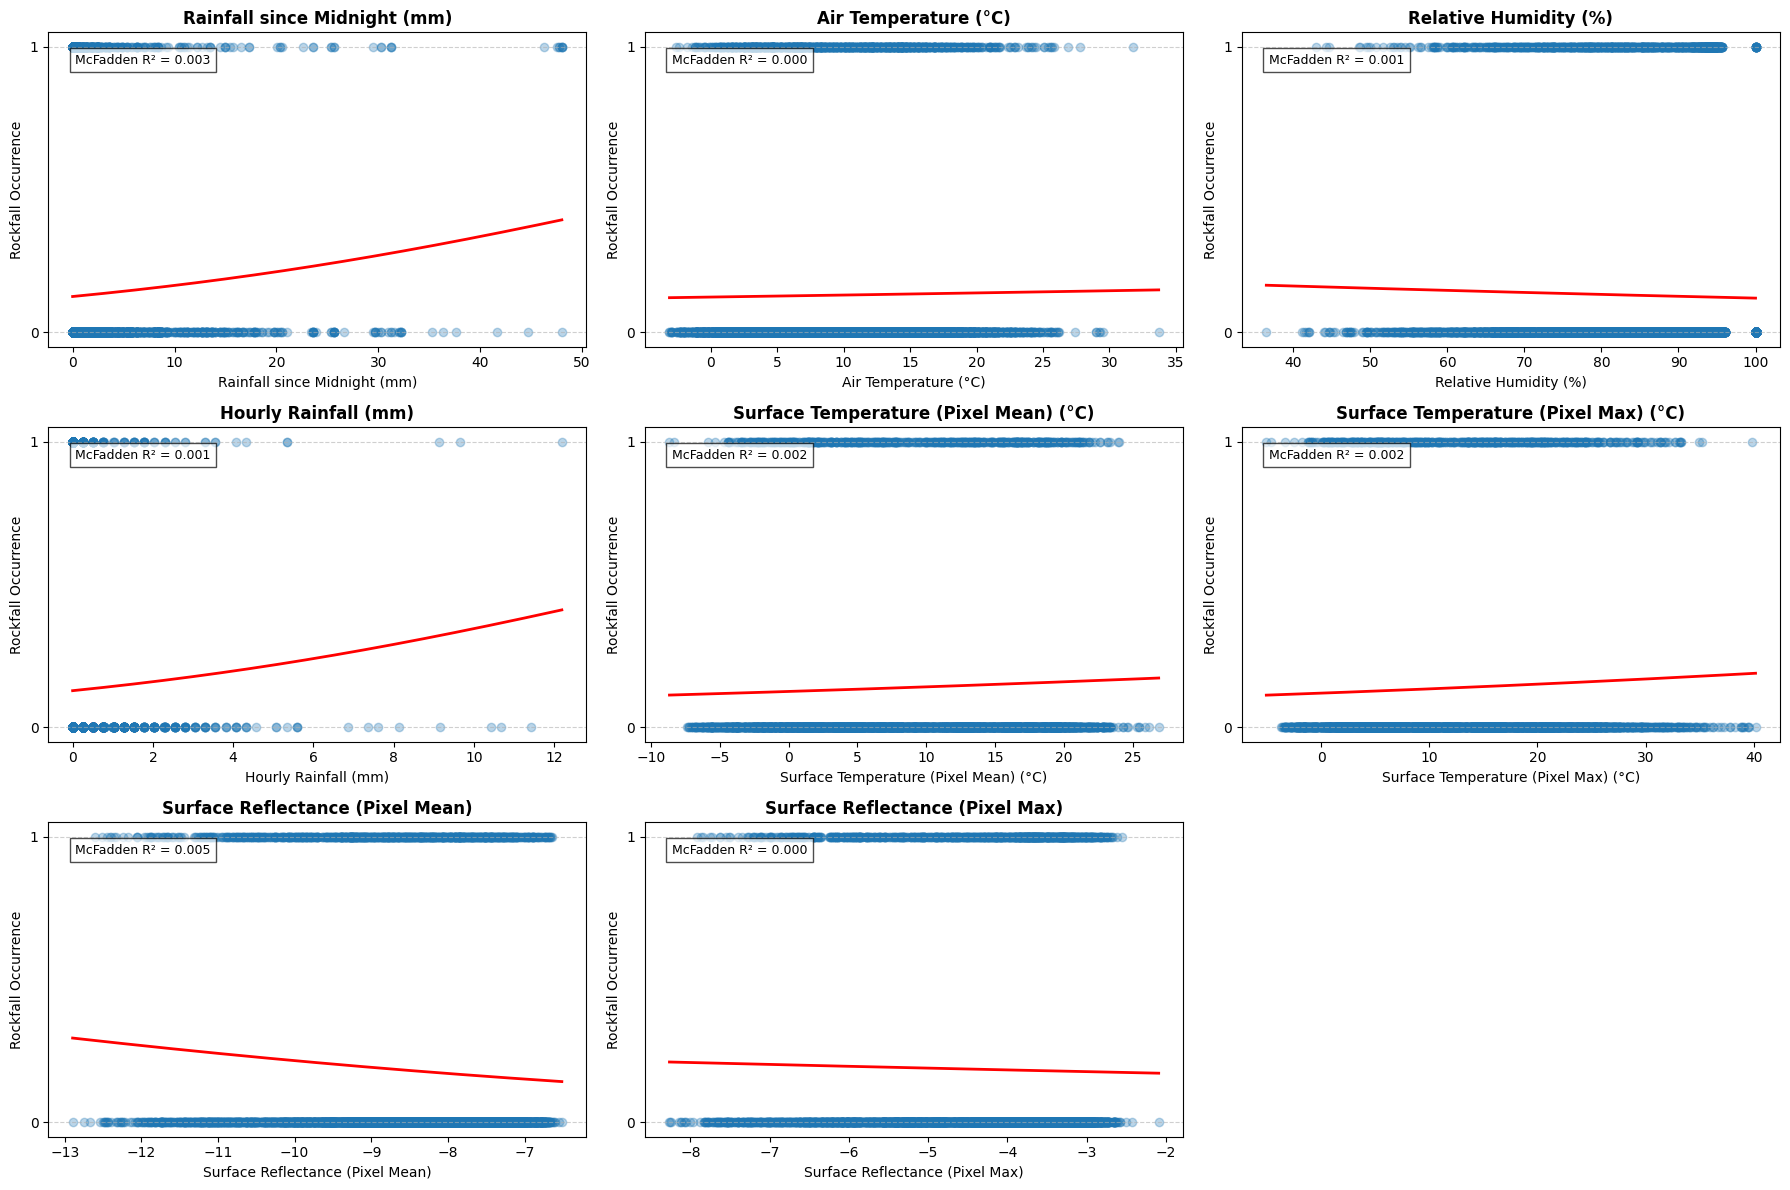

In [ ]:
# Code Block 16 (Revised): Logistic regression plot matrix for all input variables
# - Skips sine/cosine cyclic variables
# - Includes all remaining input variables
# - Produces a plot matrix (3 columns)
# - Shows logistic fit + scatter + McFadden R²
# - Y-axis fixed at [0, 1]

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

fig_width = 6
fig_height = 4

def log_likelihood(y, p):
    """Compute log-likelihood for binary outcomes."""
    eps = 1e-9
    p = np.clip(p, eps, 1 - eps)
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# Filter out sine/cosine variables
vars_to_plot = [
    v for v in input_vars
    if "sin" not in v.lower() and "cos" not in v.lower()
]

# Determine subplot grid
n_vars = len(vars_to_plot)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

plt.figure(figsize=(n_cols * fig_width, n_rows * fig_height))

for i, var in enumerate(vars_to_plot):

    # Extract x and y
    x = df_agg[var].copy()
    y = df_agg['Rockfall_Occurrence'].copy()

    # Drop NaNs
    valid = x.notna() & y.notna()
    x_clean = x[valid].values.reshape(-1, 1)
    y_clean = y[valid].values

    # Fit logistic regression
    model = LogisticRegression()
    model.fit(x_clean, y_clean)

    # Predicted probabilities for fitted model
    p_model = model.predict_proba(x_clean)[:, 1]

    # Null model (intercept only)
    p_null = np.full_like(y_clean, y_clean.mean(), dtype=float)

    # Compute McFadden pseudo-R²
    ll_model = log_likelihood(y_clean, p_model)
    ll_null = log_likelihood(y_clean, p_null)
    r2_mcfadden = 1 - (ll_model / ll_null)

    # Generate smooth curve for plotting
    x_range = np.linspace(x_clean.min(), x_clean.max(), 300).reshape(-1, 1)
    y_pred = model.predict_proba(x_range)[:, 1]

    # Subplot
    ax = plt.subplot(n_rows, n_cols, i + 1)

    # Scatter points
    ax.scatter(x_clean, y_clean, alpha=0.3, label="Observations")

    # Logistic curve
    ax.plot(x_range, y_pred, color='red', linewidth=2, label="Logistic Fit")

    # Labels
    ax.set_xlabel(clean_labels.get(var, var), fontsize=10)
    ax.set_ylabel("Rockfall Occurrence", fontsize=10)
    ax.set_title(f"{clean_labels.get(var, var)}", fontsize=12, fontweight='bold')

    # Y-axis ticks and gridlines
    ax.set_yticks([0, 1])
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Display R² on the plot
    ax.text(
        0.05, 0.9,
        f"McFadden R² = {r2_mcfadden:.3f}",
        transform=ax.transAxes,
        fontsize=9,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black')
    )

    # Legend handling — only show on first subplot
    legend = ax.get_legend()
    if i == 0:
        if legend:
            legend.set_title("")
    else:
        if legend:
            legend.remove()

plt.tight_layout()
plt.show()

I'll be honest, these plots are horrendous... they display such low R2 values, indicating the challenge of dictating rockfall occurrence from continuous variables

#Scatter Plots of Input Variables against Total Rockfall Volume (Per Hour)

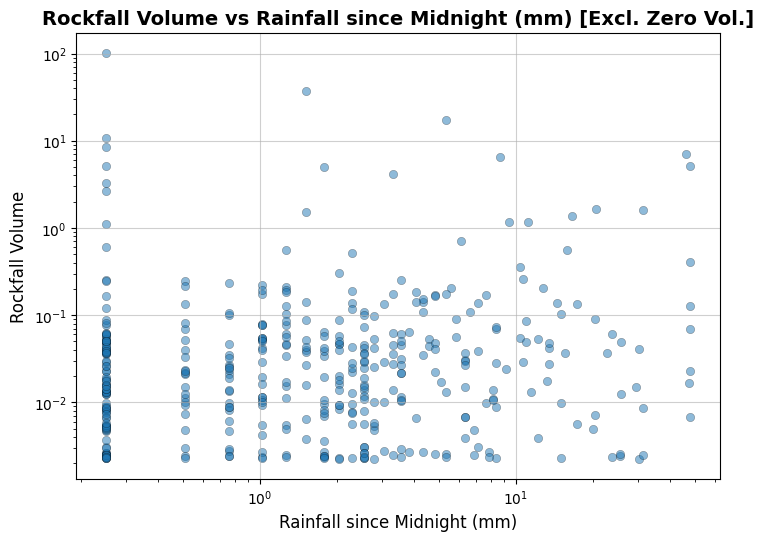

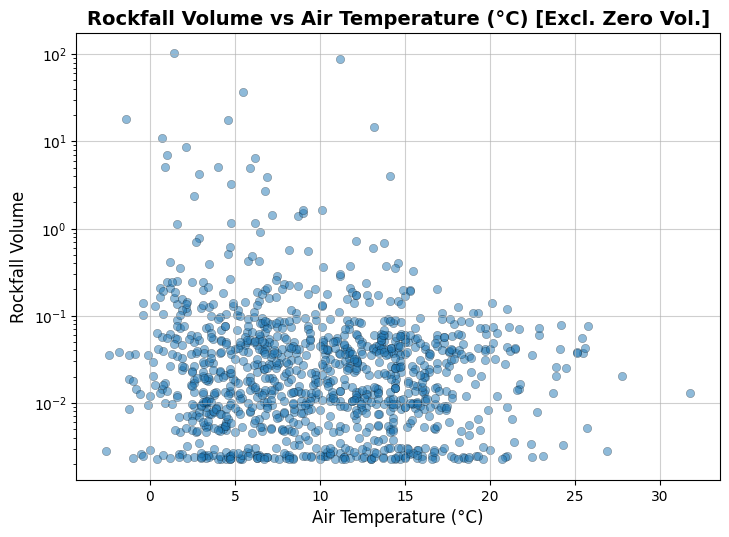

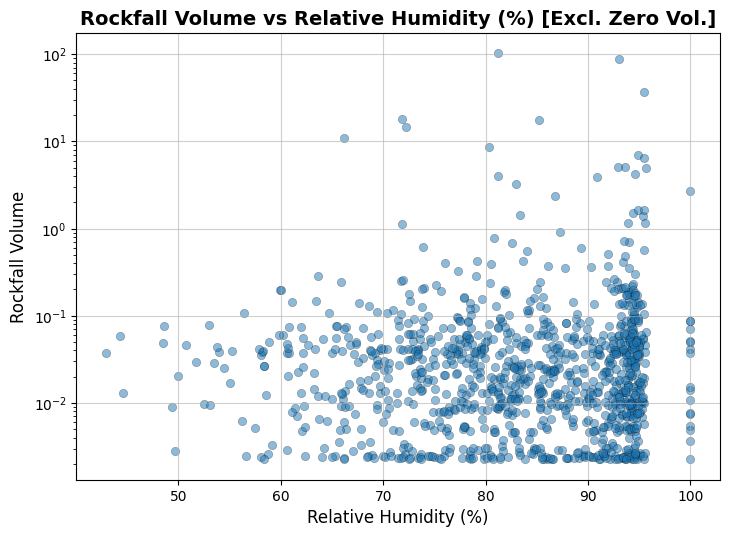

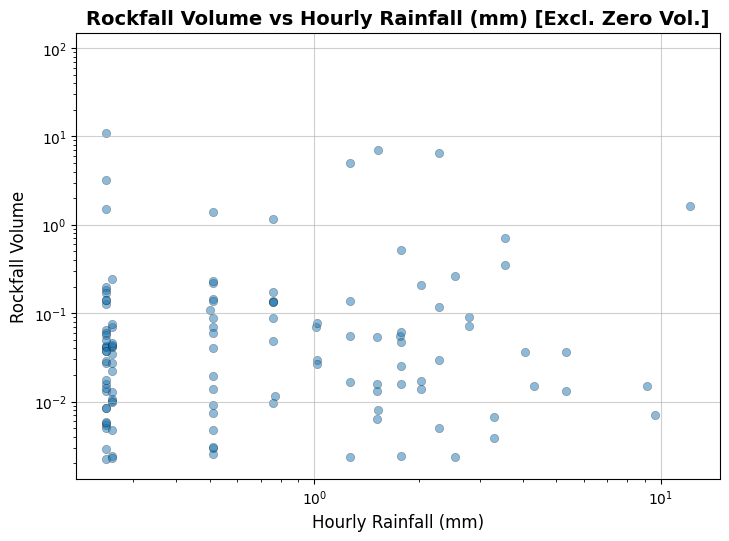

In [ ]:
# Code Block 17: Scatter plots of Rockfall_Volume vs each input variable
# Updates:
# - Skip sine/cosine date/time variables
# - Only non-zero rockfall volumes
# - Logarithmic y-axis
# - Logarithmic x-axis for rainfall variables only

import matplotlib.pyplot as plt
import numpy as np

fig_width = 8.3
fig_height = 5.8

# Filter dataset to only non-zero rockfall volumes
df_nonzero = df_agg[df_agg['Rockfall_Volume'] > 0]

for var in input_vars:

    # Skip sine/cosine cyclic variables
    if "sin" in var.lower() or "cos" in var.lower():
        continue

    x = df_nonzero[var]
    y = df_nonzero['Rockfall_Volume']

    # Drop NaNs
    valid = x.notna() & y.notna()
    x_clean = x[valid]
    y_clean = y[valid]

    # Create scatter plot
    plt.figure(figsize=(fig_width, fig_height))
    plt.scatter(x_clean, y_clean, alpha=0.5, edgecolor='k', linewidth=0.3)

    # Log-scale x-axis for rainfall variables
    if var in ['Hourly_Rainfall', 'Total_Rainfall']:
        plt.xscale('log')

    # Labels and title
    plt.xlabel(clean_labels[var], fontsize=12)
    plt.ylabel("Rockfall Volume", fontsize=12)
    plt.yscale('log')

    plt.title(f"Rockfall Volume vs {clean_labels[var]} [Excl. Zero Vol.]", fontsize=14, fontweight= 'bold')
    plt.grid(alpha=0.6)
    plt.show()

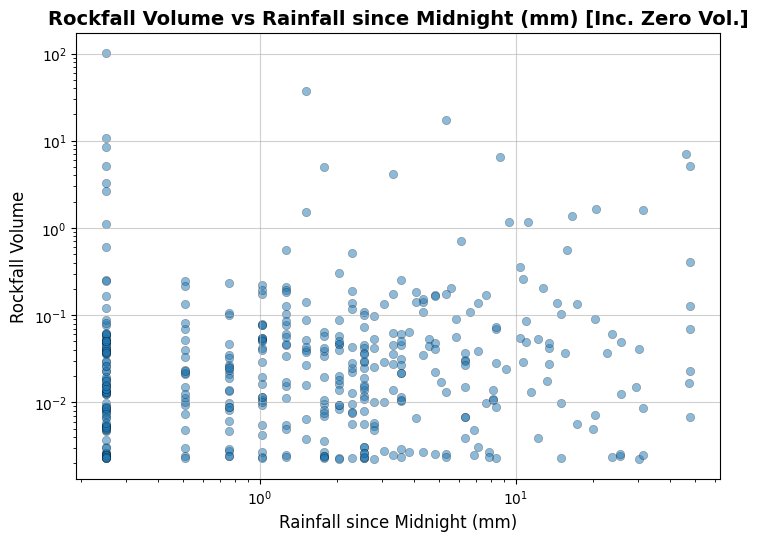

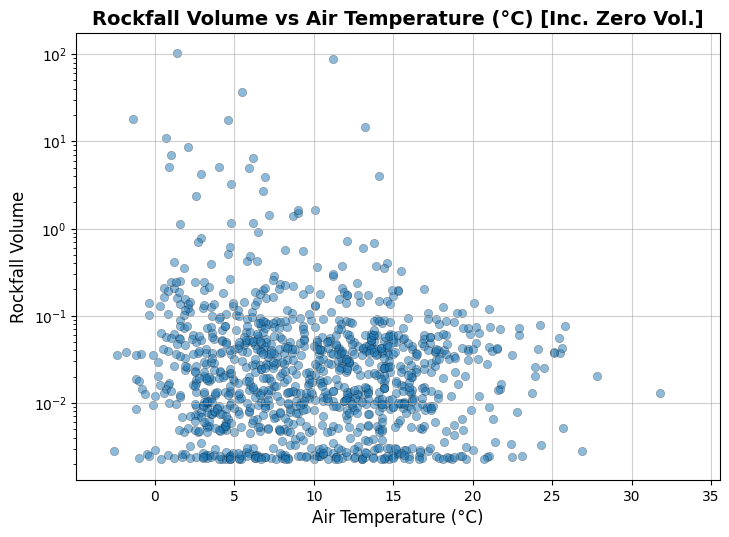

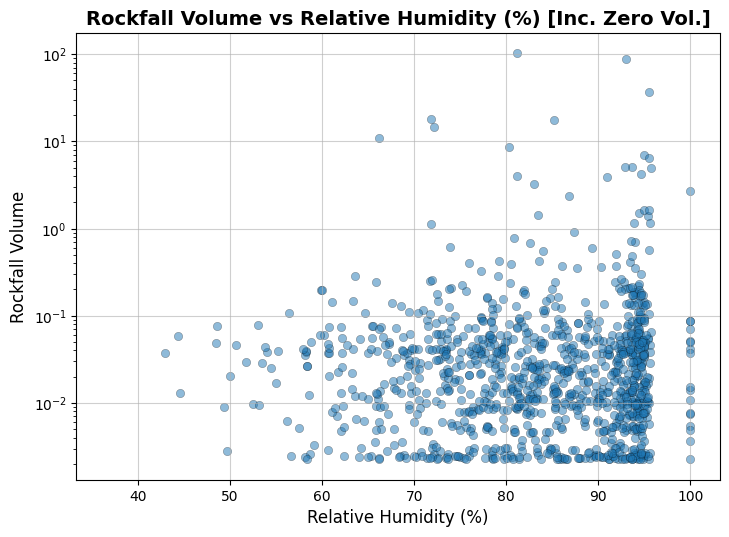

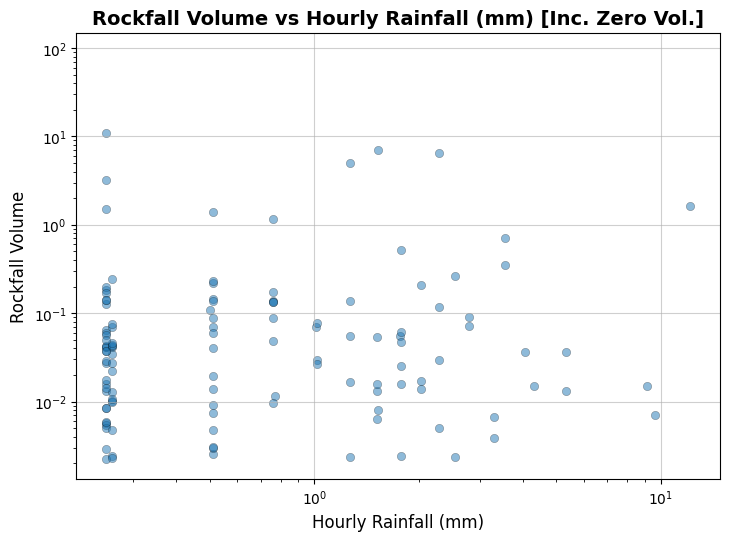

In [ ]:
# Code Block 17b: Scatter plots of Rockfall_Volume vs each input variable
# Differences from Code Block 17:
# - Zero rockfall volumes ARE included
# - Still skips sine/cosine variables
# - Log-y axis
# - Log-x axis for rainfall variables only

import matplotlib.pyplot as plt
import numpy as np

fig_width = 8.3
fig_height = 5.8

# Use full dataset (including zero volumes)
df_all = df_agg.copy()

for var in input_vars:

    # Skip sine/cosine cyclic variables
    if "sin" in var.lower() or "cos" in var.lower():
        continue

    x = df_all[var]
    y = df_all['Rockfall_Volume']

    # Drop NaNs
    valid = x.notna() & y.notna()
    x_clean = x[valid]
    y_clean = y[valid]

    # Create scatter plot
    plt.figure(figsize=(fig_width, fig_height))
    plt.scatter(x_clean, y_clean, alpha=0.5, edgecolor='k', linewidth=0.3)

    # Log-scale x-axis for rainfall variables
    if var in ['Hourly_Rainfall', 'Total_Rainfall']:
        plt.xscale('log')

    # Labels and title
    plt.xlabel(clean_labels[var], fontsize=12)
    plt.ylabel("Rockfall Volume", fontsize=12)
    plt.yscale('log')

    plt.title(f"Rockfall Volume vs {clean_labels[var]} [Inc. Zero Vol.]", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.6)
    plt.show()

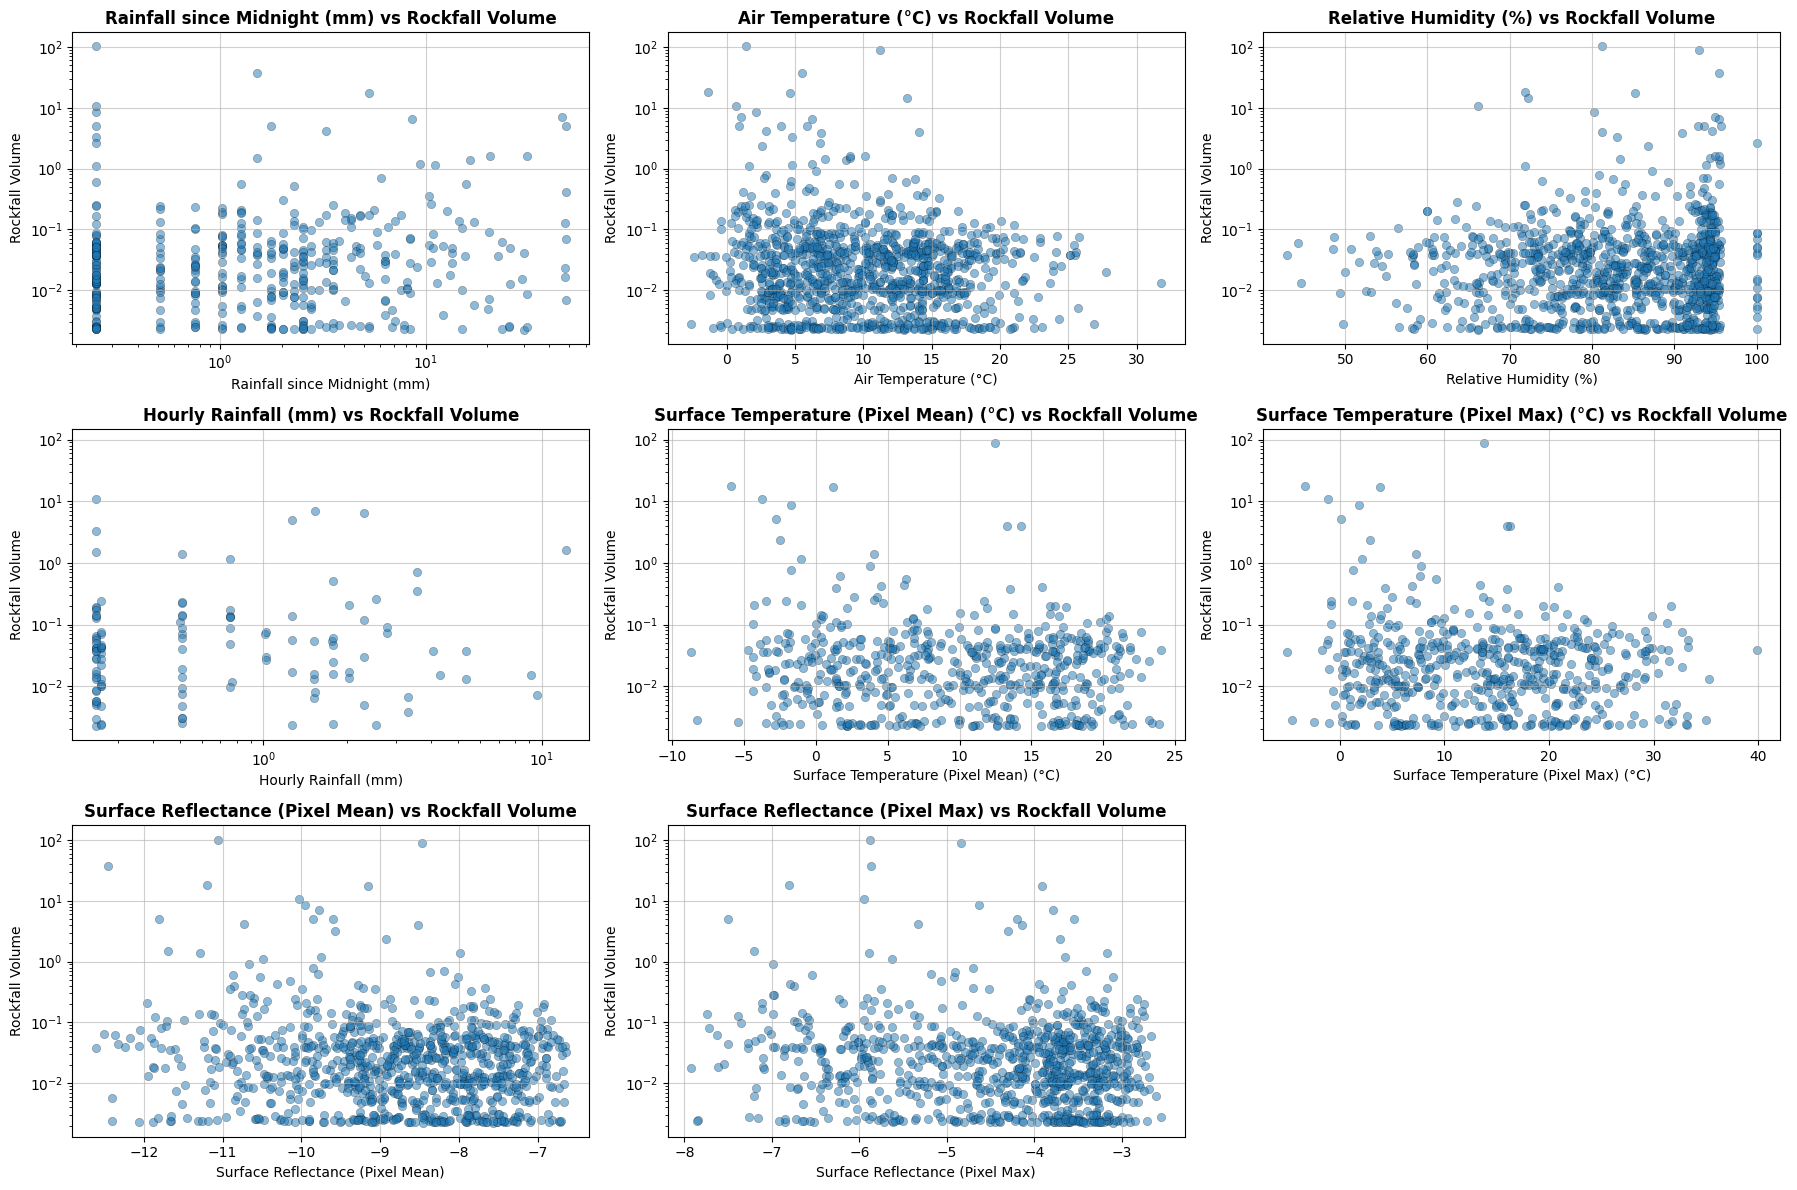

In [ ]:
# Code Block 17 (Revised): Scatter plot matrix for Rockfall_Volume vs all input variables
# - Skips sine/cosine date/time variables
# - Only non-zero rockfall volumes
# - Logarithmic y-axis
# - Logarithmic x-axis for rainfall variables only
# - Plot matrix layout (3 columns)

import matplotlib.pyplot as plt
import numpy as np

fig_width = 6
fig_height = 4

# Filter dataset to only non-zero rockfall volumes
df_nonzero = df_agg[df_agg['Rockfall_Volume'] > 0]

# Filter out sine/cosine variables
vars_to_plot = [
    v for v in input_vars
    if "sin" not in v.lower() and "cos" not in v.lower()
]

# Determine subplot grid
n_vars = len(vars_to_plot)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

plt.figure(figsize=(n_cols * fig_width, n_rows * fig_height))

for i, var in enumerate(vars_to_plot):

    x = df_nonzero[var]
    y = df_nonzero['Rockfall_Volume']

    # Drop NaNs
    valid = x.notna() & y.notna()
    x_clean = x[valid]
    y_clean = y[valid]

    # Subplot
    ax = plt.subplot(n_rows, n_cols, i + 1)

    # Scatter plot
    ax.scatter(
        x_clean,
        y_clean,
        alpha=0.5,
        edgecolor='k',
        linewidth=0.3
    )

    # Log-scale x-axis for rainfall variables
    if var in ['Hourly_Rainfall', 'Total_Rainfall']:
        ax.set_xscale('log')

    # Log-scale y-axis always
    ax.set_yscale('log')

    # Labels and title
    ax.set_xlabel(clean_labels.get(var, var), fontsize=10)
    ax.set_ylabel("Rockfall Volume", fontsize=10)
    ax.set_title(
        f"{clean_labels.get(var, var)} vs Rockfall Volume",
        fontsize=12,
        fontweight='bold'
    )

    ax.grid(alpha=0.6)

plt.tight_layout()
plt.show()

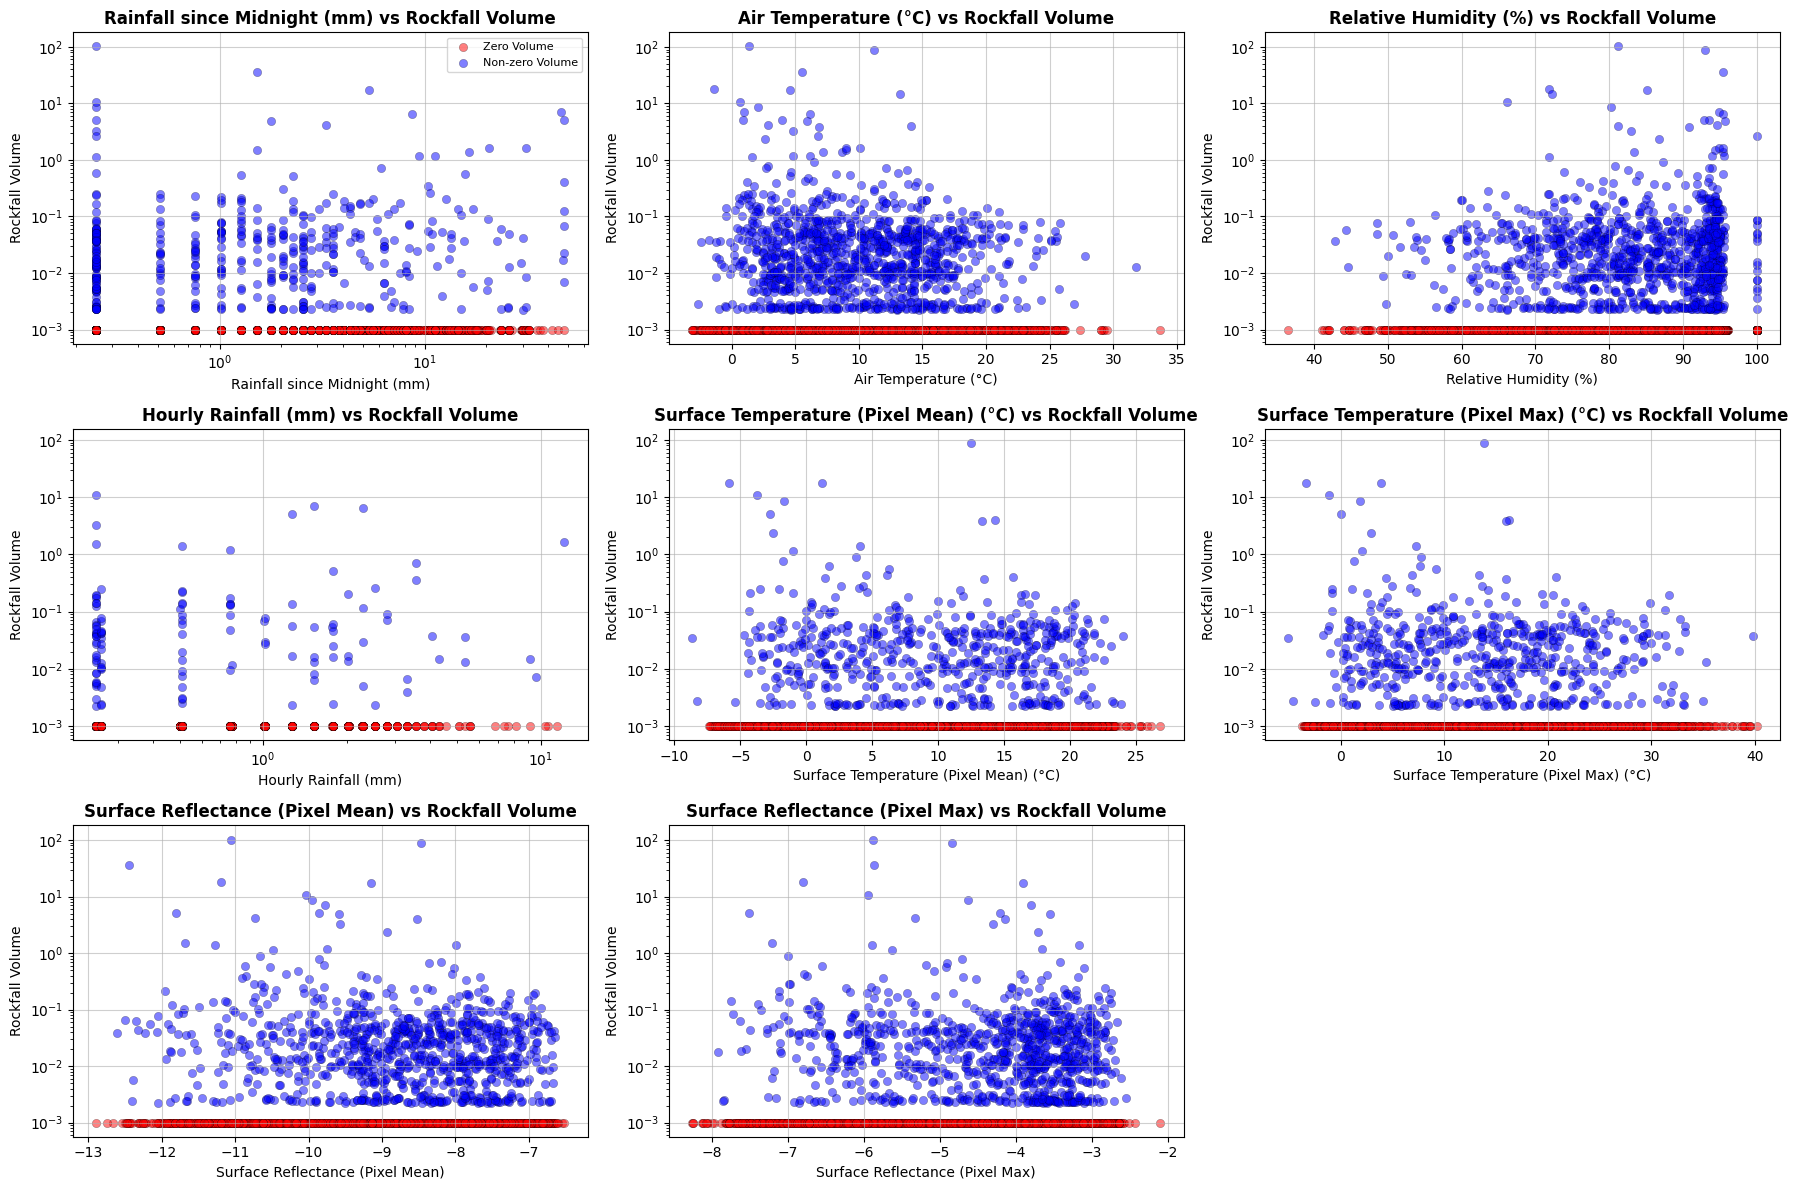

In [ ]:
# Code Block 17c: Scatter plot matrix for Rockfall_Volume vs all input variables
# - Includes ALL data (zero + non-zero)
# - Zero-volume events plotted in red at y=0.001 (log-safe)
# - Non-zero events plotted in blue
# - Skips sine/cosine variables
# - Logarithmic y-axis
# - Logarithmic x-axis for rainfall variables only
# - Plot matrix layout (3 columns)

import matplotlib.pyplot as plt
import numpy as np

fig_width = 6
fig_height = 4

# Filter out sine/cosine variables
vars_to_plot = [
    v for v in input_vars
    if "sin" not in v.lower() and "cos" not in v.lower()
]

# Determine subplot grid
n_vars = len(vars_to_plot)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

plt.figure(figsize=(n_cols * fig_width, n_rows * fig_height))

for i, var in enumerate(vars_to_plot):

    x = df_agg[var]
    y = df_agg['Rockfall_Volume']

    # Drop NaNs
    valid = x.notna() & y.notna()
    x_clean = x[valid]
    y_clean = y[valid]

    # Separate zero and non-zero volumes
    mask_zero = (y_clean == 0)
    mask_nonzero = (y_clean > 0)

    x_zero = x_clean[mask_zero]
    x_nonzero = x_clean[mask_nonzero]

    y_zero = np.full_like(x_zero, 0.001)   # small offset for log scale
    y_nonzero = y_clean[mask_nonzero]

    # Subplot
    ax = plt.subplot(n_rows, n_cols, i + 1)

    # Plot zero-volume events (red)
    ax.scatter(
        x_zero,
        y_zero,
        alpha=0.5,
        color='red',
        edgecolor='k',
        linewidth=0.3,
        label="Zero Volume"
    )

    # Plot non-zero events (blue)
    ax.scatter(
        x_nonzero,
        y_nonzero,
        alpha=0.5,
        color='blue',
        edgecolor='k',
        linewidth=0.3,
        label="Non-zero Volume"
    )

    # Log-scale x-axis for rainfall variables
    if var in ['Hourly_Rainfall', 'Total_Rainfall']:
        ax.set_xscale('log')

    # Log-scale y-axis always
    ax.set_yscale('log')

    # Labels and title
    ax.set_xlabel(clean_labels.get(var, var), fontsize=10)
    ax.set_ylabel("Rockfall Volume", fontsize=10)
    ax.set_title(
        f"{clean_labels.get(var, var)} vs Rockfall Volume",
        fontsize=12,
        fontweight='bold'
    )

    ax.grid(alpha=0.6)

    # Only show legend on first subplot
    if i == 0:
        ax.legend(fontsize=8)
    else:
        leg = ax.get_legend()
        if leg:
            leg.remove()

plt.tight_layout()
plt.show()